# Exploratory Data Analysis (EDA)  
EDA ir plašs klāsts ar metodēm, sākot ar dažu kopsavilkumu aprēķināšanau un datu agregāciju līdz dimensiju redukcijai, dashboardu veidošanas praksēm, lai iegūtu kādus ieskatus no datiem u.t.t.

In [58]:
import matplotlib.pyplot as plt
import numpy as np 

## PCA
Viena no populārākajām datu pētīšanas metodēm ir tā sauktā galveno komponenšu analīze - Principal Component Analysis (PCA).  
PCA ir ārkārtīgi jūtīga pret mērogu un testa un treniņkopas ir jāmērogo vienādi. 

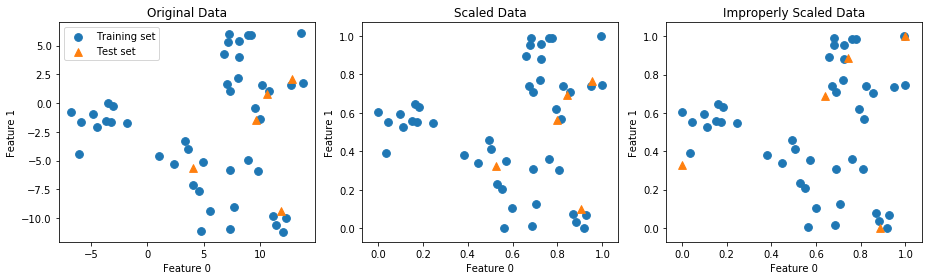

In [18]:
from sklearn.decomposition import PCA # Galveno komponešu analīzes modulis
from sklearn.model_selection import train_test_split # Kopu izveides modulis
from sklearn.datasets import make_blobs

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                 label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)

X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],marker='^', label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

Šajā gadījumā mums ir divas dimensijas testa kopā un tā kā PCA analizē varianci visiem punktiem kādā no dimensijām (kolonnām), nepareizi mērogoti dati mums sabojā rezultātus.  
Šajā piemērā nepareiza mērogošana notika, jo max un min vērtības atšķīrās testa un treniņkopām. MinMaxScaler normē vērtības tā, ka mazākās ir vienādas ar nulli un lielākās vienādas ar 1.  
Izmantojot PCA, jāņem vērā, ka mēs izvēlamies jaunu koordinātu sistēmu, kurā asis ir virzieni, kuros variance, kuri, savukārt, uzbūvējās no sākotnējajām kolonnā kāda lineārā kombinācijā.  

Jaunās 'Principal axes' ir pazīme, kura sākotnējos datos nav, kas nozīmē, ka mēs savā ziņā zaudējam datu interpretējamību. Interpretējamība var būt lieta, ko mēs gribētu savā modelī saglabāt, ja mēs gribam savus ieskatus un atklājumus vizuāli pārbaudīt vai arī prezentēt un pamatot. Modeļi un metodes bieži vien balansē kaut kur starp interpretējamību un precizitāti un datu zinātnieka uzdevums ir izvērtēt lietojamo modeli arī no tā, vai 'melnās kastes' tipa modelis ir piemērots risinājums dotai problēmai.

In [8]:
# Parauga datu kopas:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


# Pielietosim cancer datu kopai vizualizāciju ar PCA. 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [9]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [50]:
# keep the first two principal components of the data
n_comp=2
pca = PCA(n_components=n_comp)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


In [51]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [52]:
X_pca = np.append(X_pca,cancer.target.reshape(-1,1),axis=1)

In [53]:
X_pca

array([[ 9.19283683,  1.94858307,  0.        ],
       [ 2.3878018 , -3.76817174,  0.        ],
       [ 5.73389628, -1.0751738 ,  0.        ],
       ...,
       [ 1.25617928, -1.90229671,  0.        ],
       [10.37479406,  1.67201011,  0.        ],
       [-5.4752433 , -0.67063679,  1.        ]])

Text(0, 0.5, 'Second principal component')

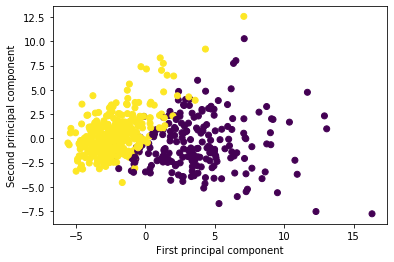

In [56]:
# plot first vs. second principal component, colored by class
# plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=X_pca[:,2])
# plt.legend(cancer.target_names, loc="best")
# plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")